# Fictional Army - Filtrando y ordenando

Importamos las librerías necesarias

In [1]:
import numpy
import pandas

### Step 1. Cread un dataframe con la información de abajo

In [2]:
# Datos de nuestra armada
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, None, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, None, 3, None, 2, None, 2, None, None, 1, 2, None],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

army_df = pandas.DataFrame(raw_data)
army_df

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523.0,5,1045,1,1.0,1,4,Arizona
1,Nighthawks,1st,52.0,42,957,5,NaN,0,24,California
2,Nighthawks,2nd,25.0,2,1099,62,3.0,1,31,Texas
3,Nighthawks,2nd,616.0,2,1400,26,NaN,1,2,Florida
4,Dragoons,1st,43.0,4,1592,73,2.0,0,3,Maine
5,Dragoons,1st,234.0,7,1006,37,NaN,1,4,Iowa
6,Dragoons,2nd,523.0,8,987,949,2.0,0,24,Alaska
7,Dragoons,2nd,62.0,3,849,48,NaN,1,31,Washington
8,Scouts,1st,NaN,4,973,48,NaN,0,2,Oregon
9,Scouts,1st,73.0,7,1005,435,1.0,0,3,Wyoming


### Step 2. Buscad valores faltantes

In [3]:
army_df.isnull().sum(axis='rows')

regiment     0
company      0
deaths       1
battles      0
size         0
veterans     0
readiness    6
armored      0
deserters    0
origin       0
dtype: int64

In [4]:
pandas.DataFrame(data=sum(army_df.isna().values).reshape(1,10), columns=army_df.columns)

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,0,0,1,0,0,0,6,0,0,0


### Step 3. Eliminaremos aquellos que superen un umbral de 30% de datos faltantes

In [5]:
army_df_clean= army_df.dropna(axis='columns', thresh=army_df.shape[0]*0.70)
army_df_clean

,regiment,company,deaths,battles,size,veterans,armored,deserters,origin
0,Nighthawks,1st,523.0,5,1045,1,1,4,Arizona
1,Nighthawks,1st,52.0,42,957,5,0,24,California
2,Nighthawks,2nd,25.0,2,1099,62,1,31,Texas
3,Nighthawks,2nd,616.0,2,1400,26,1,2,Florida
4,Dragoons,1st,43.0,4,1592,73,0,3,Maine
5,Dragoons,1st,234.0,7,1006,37,1,4,Iowa
6,Dragoons,2nd,523.0,8,987,949,0,24,Alaska
7,Dragoons,2nd,62.0,3,849,48,1,31,Washington
8,Scouts,1st,NaN,4,973,48,0,2,Oregon
9,Scouts,1st,73.0,7,1005,435,0,3,Wyoming


### Step 4. Rellenad los datos faltantes con la media de la serie

<Axes: >

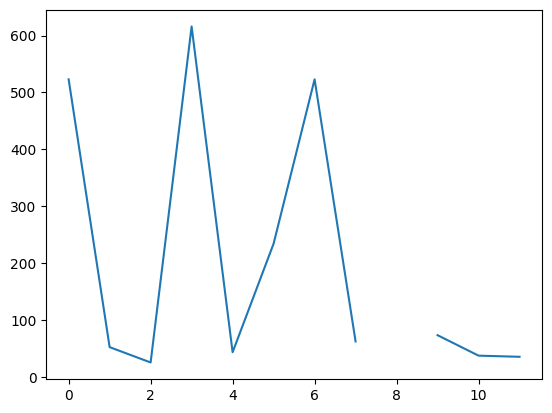

In [6]:
army_df_clean["deaths"].plot()

In [8]:
muertes_promedio = army_df_clean["deaths"].mean()

In [9]:
army_df_clean["deaths"] = army_df["deaths"].fillna(muertes_promedio)

/tmp/ipykernel_16265/3940397936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  army_df_clean["deaths"] = army_df["deaths"].fillna(muertes_promedio)


In [10]:
army_df_clean

,regiment,company,deaths,battles,size,veterans,armored,deserters,origin
0,Nighthawks,1st,523.000000,5,1045,1,1,4,Arizona
1,Nighthawks,1st,52.000000,42,957,5,0,24,California
2,Nighthawks,2nd,25.000000,2,1099,62,1,31,Texas
3,Nighthawks,2nd,616.000000,2,1400,26,1,2,Florida
4,Dragoons,1st,43.000000,4,1592,73,0,3,Maine
5,Dragoons,1st,234.000000,7,1006,37,1,4,Iowa
6,Dragoons,2nd,523.000000,8,987,949,0,24,Alaska
7,Dragoons,2nd,62.000000,3,849,48,1,31,Washington
8,Scouts,1st,202.090909,4,973,48,0,2,Oregon
9,Scouts,1st,73.000000,7,1005,435,0,3,Wyoming


### Step 5. Marcad como índice la columna `origin`

In [11]:
army_df_clean.index

RangeIndex(start=0, stop=12, step=1)

In [12]:
army_df_clean.set_index('origin', inplace=True)

### Step 6. Elegid 'deaths', 'size' y 'deserters' de las filas de Maine y Alaska

In [13]:
army_df_clean.loc[["Maine","Alaska"],["deaths","size","deserters"]]

,deaths,size,deserters
origin,,,
Maine,43.0,1592,3
Alaska,523.0,987,24


In [14]:
army_df_clean.iloc[[4,6], [2,4,-1]]

,deaths,size,deserters
origin,,,
Maine,43.0,1592,3
Alaska,523.0,987,24


### Step 7. Obtened los datos de las filas 3 a 7 y columnas 3 a 6

In [16]:
army_df_clean.iloc[3:8, 3:7]

,battles,size,veterans,armored
origin,,,,
Florida,2,1400,26,1
Maine,4,1592,73,0
Iowa,7,1006,37,1
Alaska,8,987,949,0
Washington,3,849,48,1


### Step 8. Mostrad los datos de la 4 fila en adelante

In [17]:
army_df_clean[4:]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Maine,Dragoons,1st,43.000000,4,1592,73,0,3
Iowa,Dragoons,1st,234.000000,7,1006,37,1,4
Alaska,Dragoons,2nd,523.000000,8,987,949,0,24
Washington,Dragoons,2nd,62.000000,3,849,48,1,31
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3
Louisana,Scouts,2nd,37.000000,8,1099,63,1,2
Georgia,Scouts,2nd,35.000000,9,1523,345,1,3


### Step 9. Mostrad los datos hasta la cuarta fila

In [18]:
army_df_clean[:4]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Arizona,Nighthawks,1st,523.0,5,1045,1,1,4
California,Nighthawks,1st,52.0,42,957,5,0,24
Texas,Nighthawks,2nd,25.0,2,1099,62,1,31
Florida,Nighthawks,2nd,616.0,2,1400,26,1,2


### Step 10. Mostrad solo las columnas de la 3 a la 7

In [19]:
army_df_clean.iloc[:,3:8]

,battles,size,veterans,armored,deserters
origin,,,,,
Arizona,5,1045,1,1,4
California,42,957,5,0,24
Texas,2,1099,62,1,31
Florida,2,1400,26,1,2
Maine,4,1592,73,0,3
Iowa,7,1006,37,1,4
Alaska,8,987,949,0,24
Washington,3,849,48,1,31
Oregon,4,973,48,0,2


### Step 11. Buscad las filas con más de 50 muertes informadas

In [20]:
army_df_clean[army_df_clean["deaths"] > 50]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Arizona,Nighthawks,1st,523.000000,5,1045,1,1,4
California,Nighthawks,1st,52.000000,42,957,5,0,24
Florida,Nighthawks,2nd,616.000000,2,1400,26,1,2
Iowa,Dragoons,1st,234.000000,7,1006,37,1,4
Alaska,Dragoons,2nd,523.000000,8,987,949,0,24
Washington,Dragoons,2nd,62.000000,3,849,48,1,31
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3


### Step 12. Mostrad las filas con muertes comprendidas entre 50 y 500

In [21]:
condicion = (army_df_clean["deaths"] > 50) & (army_df_clean["deaths"] < 500)
army_df_clean[condicion]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
California,Nighthawks,1st,52.000000,42,957,5,0,24
Iowa,Dragoons,1st,234.000000,7,1006,37,1,4
Washington,Dragoons,2nd,62.000000,3,849,48,1,31
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3


In [22]:
condicion = ~((army_df_clean["deaths"] < 50) | (army_df_clean["deaths"] > 500))
army_df_clean[condicion]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
California,Nighthawks,1st,52.000000,42,957,5,0,24
Iowa,Dragoons,1st,234.000000,7,1006,37,1,4
Washington,Dragoons,2nd,62.000000,3,849,48,1,31
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3


### Step 13. Buscad regimientos que no se llamen "Dragoons"

In [23]:
army_df_clean.loc[~(army_df_clean["regiment"] == "Dragoons")]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Arizona,Nighthawks,1st,523.000000,5,1045,1,1,4
California,Nighthawks,1st,52.000000,42,957,5,0,24
Texas,Nighthawks,2nd,25.000000,2,1099,62,1,31
Florida,Nighthawks,2nd,616.000000,2,1400,26,1,2
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3
Louisana,Scouts,2nd,37.000000,8,1099,63,1,2
Georgia,Scouts,2nd,35.000000,9,1523,345,1,3


In [24]:
army_df_clean[~(army_df_clean["regiment"] == "Dragoons")]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Arizona,Nighthawks,1st,523.000000,5,1045,1,1,4
California,Nighthawks,1st,52.000000,42,957,5,0,24
Texas,Nighthawks,2nd,25.000000,2,1099,62,1,31
Florida,Nighthawks,2nd,616.000000,2,1400,26,1,2
Oregon,Scouts,1st,202.090909,4,973,48,0,2
Wyoming,Scouts,1st,73.000000,7,1005,435,0,3
Louisana,Scouts,2nd,37.000000,8,1099,63,1,2
Georgia,Scouts,2nd,35.000000,9,1523,345,1,3


### Step 14. Buscad la información relativa a los origenes Texas y Arizona

In [25]:
indices = ["Texas","Arizona"]

army_df_clean.loc[indices, :]

,regiment,company,deaths,battles,size,veterans,armored,deserters
origin,,,,,,,,
Texas,Nighthawks,2nd,25.0,2,1099,62,1,31
Arizona,Nighthawks,1st,523.0,5,1045,1,1,4
